<a href="https://colab.research.google.com/github/luizfsjunior/data-science/blob/main/Projeto_2_valida%C3%A7%C3%A3o_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install skorch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 155 kB 6.6 MB/s 


In [7]:
import pandas as pd
import numpy as np
import torch.nn as nn
from skorch import NeuralNetBinaryClassifier
import torch
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [16]:
np.random.seed(123)
torch.manual_seed(123)

previsores = pd.read_csv('/content/drive/MyDrive/Curso pytorch/entradas_breast.csv')
classe = pd.read_csv('/content/drive/MyDrive/Curso pytorch/saidas_breast.csv')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


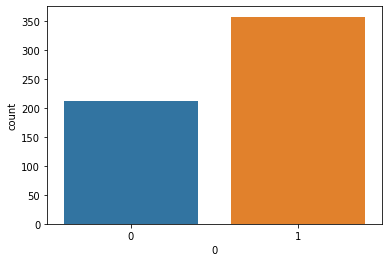

In [9]:
sns.countplot(classe['0']);

In [30]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [35]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dense2 = nn.Linear(16, 1)
    ##torch.nn.init.uniform_(self.dense2.weight)
  
  def forward(self, x):
    x = self.dense0(x)
    x = self.activation0(x)
    x = self.dense1(x)
    x = self.activation1(x)
    x = self.dense2(x)
   ## x = self.output(x)
    return x

In [36]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss, # ** ATUALIZAÇÃO **
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

In [37]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1     2252.1787  0.1979
      2      313.0201  0.0637
      3      120.4159  0.0660
      4       79.8029  0.0657
      5       17.6209  0.0670
      6       71.7044  0.0692
      7       23.7139  0.0670
      8       16.5640  0.0670
      9       31.3352  0.0763
     10       26.1941  0.0704
     11       17.5838  0.0676
     12       23.1886  0.0743
     13       31.0239  0.0735
     14       14.8159  0.0837
     15       36.0454  0.0675
     16       13.9543  0.0670
     17       39.9510  0.0771
     18       17.2589  0.0637
     19       18.4773  0.0651
     20       11.3724  0.0660
     21       52.7246  0.0653
     22       31.4019  0.0641
     23        7.8203  0.0647
     24       11.4771  0.0678
     25       14.0130  0.0746
     26       12.5836  0.0707
     27       11.4833  0.0735
     28       10.9558  0.0729
     29       42.8306  0.0641
     30       15.0743  0.0637
     31        8.6549  0.0669
     32   

In [38]:
resultados.shape


(10,)

In [39]:
resultados


array([0.80701754, 0.85964912, 0.8245614 , 0.9122807 , 0.87719298,
       0.9122807 , 0.8245614 , 0.8245614 , 0.54385965, 0.80357143])

In [40]:
media =resultados.mean()
media

0.818953634085213

In [42]:
desvio = resultados.std()
desvio

0.0993065717427555